# Case Study
A startup company has asked us to detect the spam emails. As we are aware, detecting spam emails is always helpful to dedicate your focus on relevant emails.

## Problem Statement
We need to identify whether email is an spam or NOT, we are given features i.e. Subject and Message. 
It's an NLP problem as both features are object(String) dtype. As a whole it's an classification problem, given each document need to categorize them under spam or not.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
warnings.filterwarnings('ignore')

### Importing data

In [2]:
Email_df=pd.read_csv("/Users/bhupendrakumar/Documents/Personal/Internship/Email Spam detection/messages.csv",encoding='latin-1')

In [3]:
#Get size of the data
Email_df.shape
# We have 2893 rows and 3 columns/features

(2893, 3)

In [4]:
Email_df.head(20)

subject  \
0             job posting - apple-iss research center   
1                                                 NaN   
2   query : letter frequencies for text identifica...   
3                                                risk   
4                            request book information   
5   call for abstracts : optimality in syntactic t...   
6                 m . a . in scandinavian linguistics   
7   call for papers : linguistics session of the m...   
8                     foreign language in commercials   
9   fulbright announcement : please post / dissemi...   
10                        gala ' 95 : call for papers   
11  bu conf on language development ' 95 - announc...   
12                      korean software for macintosh   
13                                                NaN   
14  simultaneous prepositions and postpositions in...   
15             sum : imperatives without you subjects   
16                                           policies   
17  * * * correction to hellenistic greek announce...   
18                          question on audio samples   
19                                sexism and language   

                                              message  label  
0   content - length : 3386 apple-iss research cen...      0  
1   lang classification grimes , joseph e . and ba...      0  
2   i am posting this inquiry for sergei atamas ( ...      0  
3   a colleague and i are researching the differin...      0  
4   earlier this morning i was on the phone with a...      0  
5   content - length : 4437 call for papers is the...      0  
6   m . a . in scandinavian linguistics at the uni...      0  
7   call for papers linguistics session - - midwes...      0  
8   content - length : 1937 greetings ! i ' m wond...      0  
9   fulbright announcement : please post / dissemi...      0  
10  groningen assembly on language acquisition 199...      0  
11  20th annual boston university conference on la...      0  
12  dear sir / madam , would you please send me an...      0  
13  syntax the antisymmetry of syntax richard s . ...      0  
14  i ' m looking for analyses of nominal construc...      0  
15  content - length : 3573 summary of responses t...      0  
16  moderators ' message a very happy 1995 to all ...      0  
17  a couple of days ago i send an fyi on hellenis...      0  
18  i am looking for audio samples of english spee...      0  
19  re lydie e . meunier 's latest , i did not mea...      0

In [5]:
Email_df['label'].value_counts()
# Where 0 represents not a SPAM and 1 represents SPAM emails
# It's an imbalanced data set

0    2412
1     481
Name: label, dtype: int64

In [7]:
#Ratio's
print('Spam ratio = ', (Email_df['label'].value_counts()[1]/Email_df.shape[0])*100)
print('Non Spam ratio = ', (Email_df['label'].value_counts()[0]/Email_df.shape[0])*100)
# Observation as clearly seen it's an imbalanced data set. i.e., spam emails consists of approx 17% of available 
#  data, which is quite obvious. Spam emails doesn't happen to be often.

Spam ratio =  16.626339440027653
Non Spam ratio =  83.37366055997235


In [8]:
Email_df.dtypes
# Data types of variables are correct, no need to change.

subject    object
message    object
label       int64
dtype: object

In [9]:
#Convert all the messages to lower case
Email_df['subject']=Email_df['subject'].str.lower()
Email_df['message']=Email_df['message'].str.lower()

In [10]:
Email_df.head(20)

subject  \
0             job posting - apple-iss research center   
1                                                 NaN   
2   query : letter frequencies for text identifica...   
3                                                risk   
4                            request book information   
5   call for abstracts : optimality in syntactic t...   
6                 m . a . in scandinavian linguistics   
7   call for papers : linguistics session of the m...   
8                     foreign language in commercials   
9   fulbright announcement : please post / dissemi...   
10                        gala ' 95 : call for papers   
11  bu conf on language development ' 95 - announc...   
12                      korean software for macintosh   
13                                                NaN   
14  simultaneous prepositions and postpositions in...   
15             sum : imperatives without you subjects   
16                                           policies   
17  * * * correction to hellenistic greek announce...   
18                          question on audio samples   
19                                sexism and language   

                                              message  label  
0   content - length : 3386 apple-iss research cen...      0  
1   lang classification grimes , joseph e . and ba...      0  
2   i am posting this inquiry for sergei atamas ( ...      0  
3   a colleague and i are researching the differin...      0  
4   earlier this morning i was on the phone with a...      0  
5   content - length : 4437 call for papers is the...      0  
6   m . a . in scandinavian linguistics at the uni...      0  
7   call for papers linguistics session - - midwes...      0  
8   content - length : 1937 greetings ! i ' m wond...      0  
9   fulbright announcement : please post / dissemi...      0  
10  groningen assembly on language acquisition 199...      0  
11  20th annual boston university conference on la...      0  
12  dear sir / madam , would you please send me an...      0  
13  syntax the antisymmetry of syntax richard s . ...      0  
14  i ' m looking for analyses of nominal construc...      0  
15  content - length : 3573 summary of responses t...      0  
16  moderators ' message a very happy 1995 to all ...      0  
17  a couple of days ago i send an fyi on hellenis...      0  
18  i am looking for audio samples of english spee...      0  
19  re lydie e . meunier 's latest , i did not mea...      0

In [11]:
print(Email_df['message'][0])
print(Email_df['message'][1000])
print(Email_df['message'][2000])
# By observing few messages, following are my observations:
# i. Special characters are widely used, so we can replace them by empty string
# ii. Need to replace email address
#

content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and 

In [12]:
# Replace email address by NULL string
Email_df['message'] = Email_df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"")

#Replace URLs with NULL string
Email_df['message'] = Email_df['message'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',"")

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
Email_df['message'] = Email_df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

#Replace numbers with NULL string
Email_df['message'] = Email_df['message'].str.replace(r'\d+(\.\d+)?', "")

In [13]:
# Remove _(Underscores)
Email_df['message'] = Email_df['message'].str.replace("_","")

# Remove punctuation
Email_df['message'] = Email_df['message'].str.replace(r'[^\w\d\s]', '')

# Replace whitespace between terms with a single space
Email_df['message'] = Email_df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
Email_df['message'] = Email_df['message'].str.replace(r'^\s+|\s+?$', '')

In [14]:
# Removing words with length <=2, since research shows that they doesn't carry significant meaning.
for iIter in range(Email_df.shape[0]):
    Email_df['message'][iIter]=" ".join([sWord for sWord in nltk.word_tokenize(Email_df['message'][iIter]) if len(sWord)>2])

In [15]:
# Printing out random texts for observation
print(Email_df['message'][0])
print('*'*200)
print(Email_df['message'][1000])
print('*'*200)
print(Email_df['message'][2000])
# texts looks good now.

content length appleiss research center million joint venture between apple computer inc and the institute systems science the national university singapore located singapore looking for senior speech scientist the successful candidate will have research expertise computational linguistics including natural language processing and english and chinese statistical language modeling knowledge stateof theart corpusbased gram language models cache language models and partof speech language models are required text speech project leader the successful candidate will have research expertise expertise two more the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge the phonology syntax and semantics chinese required knowledge acoustic phonetics and speech signal processing desirable both candidates will have phd with least years relevant

In [16]:
# Importing NLTK library and stopwords corpus
from nltk.corpus import stopwords
import nltk
import string

In [17]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# Remove stopwords. I found iss, nus and edu. While observing few emails manually, further observations will definitely
# take more time.
stop_words = set(stopwords.words('english') + ['iss', 'nus', 'edu'])

#Removing stopwords from text
Email_df['message'] = Email_df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [19]:
#Checking sample data, preprocessing on text files is almost done with removal of stopwords.
print(Email_df['message'][0])
print('*'*200)
print(Email_df['message'][1000])
print('*'*200)
print(Email_df['message'][2000])

content length appleiss research center million joint venture apple computer inc institute systems science national university singapore located singapore looking senior speech scientist successful candidate research expertise computational linguistics including natural language processing english chinese statistical language modeling knowledge stateof theart corpusbased gram language models cache language models partof speech language models required text speech project leader successful candidate research expertise expertise two following areas computational linguistics including natural language parsing lexical database design statistical language modeling text tokenization normalization prosodic analysis substantial knowledge phonology syntax semantics chinese required knowledge acoustic phonetics speech signal processing desirable candidates phd least years relevant work experience technical msc degree least years experienc strong software engineering skills including design imple

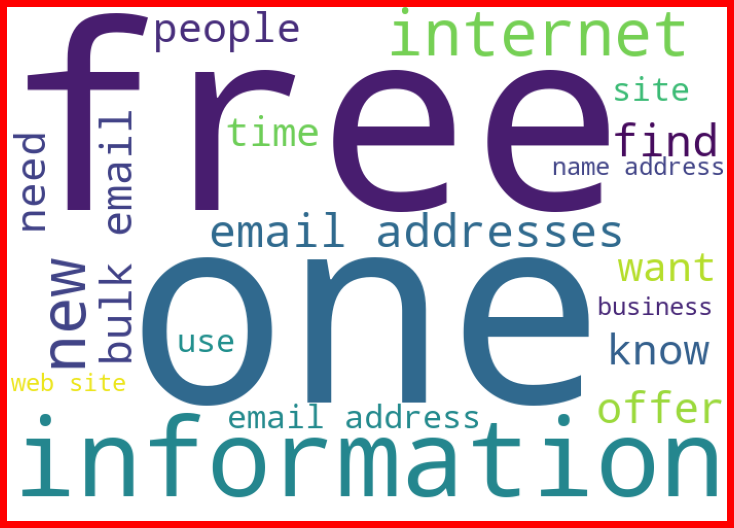

In [36]:
# Getting sense of loud words in spam messages
from wordcloud import WordCloud


spams = Email_df['message'][Email_df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
# As we can see in the image below words which are dominating in spam emails. 

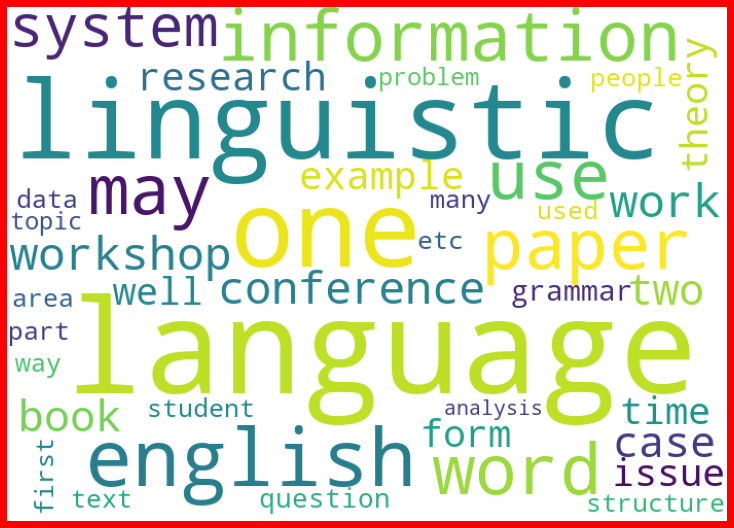

In [21]:
#Getting sense of loud words not in spam messages
from wordcloud import WordCloud


spams = Email_df['message'][Email_df['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
# It's clearly eveident that all these emails are related to linguistic research topics. As emails related to 
# linguistics research work/topic. Then it's most likely a valid email.

In [22]:
# Importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [23]:
# I will be using tf-idf vectorizer to convert words to vetors.
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()

features = tf_vec.fit_transform(Email_df['message'])

X = features
y = Email_df['label']

In [24]:
# Finding the best fit ML algo's and tuning random state.
MLAlgos_list=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),AdaBoostClassifier(),SVC(),GradientBoostingClassifier()]
for algo in MLAlgos_list:
    max_acc=0
    active_acc=0
    iBest_rs=0
    model=algo
    for iActive_rs in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=iActive_rs, test_size=0.2)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        active_acc=accuracy_score(pred,y_test)
        if active_acc>max_acc:
            max_acc=active_acc
            iBest_rs=iActive_rs
    print("Best accuracy for {} algo is {} for random state {}.".format(algo,max_acc,iBest_rs))
#Observation:
# KNN is turning out to be the best fit model, with accuracy of almost 100%at random state 59.
# As we know, our data set is imbalanced dataset, so just relying on the accuracy score is definitely not
# a good practice, we can get clear picture through AUC-ROC curve.

Best accuracy for LogisticRegression() algo is 0.9706390328151986 for random state 45.
Best accuracy for KNeighborsClassifier() algo is 0.998272884283247 for random state 59.
Best accuracy for DecisionTreeClassifier() algo is 0.9689119170984456 for random state 71.
Best accuracy for AdaBoostClassifier() algo is 0.9913644214162349 for random state 75.
Best accuracy for SVC() algo is 0.9879101899827288 for random state 45.
Best accuracy for GradientBoostingClassifier() algo is 0.9844559585492227 for random state 84.


In [25]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=59)

Best_fit_Alg=KNeighborsClassifier()

Best_fit_Alg.fit(X_train,Y_train)

y_pred= Best_fit_Alg.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9958563535911602


In [26]:
print(classification_report(y_test, y_pred))
# f1-score, recall and precision are high.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       0.99      0.98      0.99       115

    accuracy                           1.00       724
   macro avg       0.99      0.99      0.99       724
weighted avg       1.00      1.00      1.00       724



In [27]:
# Hypertuning the parameters of KNN using GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters={'weights':['uniform', 'distance'],'n_neighbors':[5,20,30,40,50],'algorithm':['auto','ball_tree','kd_tree','brute']}
KNC=KNeighborsClassifier()
KN_BestFit=GridSearchCV(KNC,parameters)
KN_BestFit.fit(X,y)
print(KN_BestFit.best_params_)

{'algorithm': 'auto', 'n_neighbors': 40, 'weights': 'distance'}


In [28]:
# As observed above, KNN with parameters i.e., neighbors 40 and weights as 'distance' is resulting into
#  best fit model.
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=59)

Best_fit_Alg=KNeighborsClassifier(weights='distance',n_neighbors=40)

Best_fit_Alg.fit(X_train,Y_train)

y_pred= Best_fit_Alg.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9848066298342542


In [29]:
# Using cross validation to check whether if we are under/over fitting the model.
from sklearn.model_selection import cross_val_score
# Calc cross validation scores to get better idea.
score=cross_val_score(Best_fit_Alg,X,y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))
# Score is approximately 99%. We are not under or overfitting the model.

std: 0.0
cross_val_score: 98.51481958762886


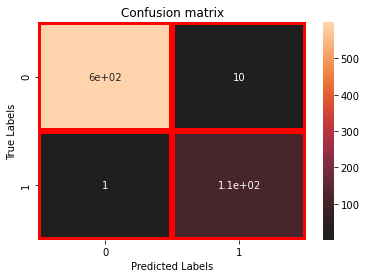

In [30]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

# Observation:
# i. TP and TN values are high, our predictions are spot on despite of having an imbalanced data set.

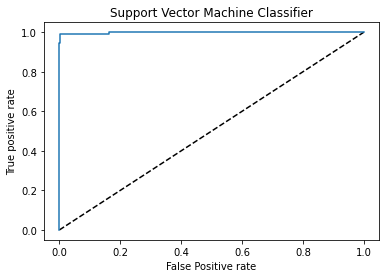

In [38]:
# ROC_curve
y_predProb=Best_fit_Alg.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_predProb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="SVM Classifier")
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.title("Support Vector Machine Classifier")
plt.show()
#Observation:
# i. As we can see in the graph below, for lower fpr we are having higher tpr.
# ii. Area under the curve is almost equivalent to 1.
# iii. Now, we can deploy the model for unseen data set.

In [37]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(Best_fit_Alg,'Email_Spam_Detection.pkl')

['Email_Spam_Detection.pkl']